<center><h1><b>5주차 ✅ 폐기물 데이터 시각화</b></h1></center>

In [239]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots

In [33]:
def get_font_family():
    """
    시스템 환경에 따른 기본 폰트명을 반환하는 함수
    """
    import platform
    system_name = platform.system()

    if system_name == "Darwin":
        font_family = "AppleGothic"
    elif system_name == "Windows":
        font_family = "Malgun Gothic"
    else:
        # Linux(colab)
        !apt-get install fonts-nanum - qq > /dev/null
        !fc-cache - fv

        import matplotlib as mpl
        mpl.font_manager._rebuild()
        findfont = mpl.font_manager.fontManager.findfont
        mpl.font_manager.findfont = findfont
        mpl.backends.backend_agg.findfont = findfont

        font_family = "NanumBarunGothic"
    return font_family


# style 설정은 꼭 폰트설정 위에서 합니다.
# style 에 폰트 설정이 들어있으면 한글폰트가 초기화 되어 한글이 깨집니다.
plt.style.use("seaborn")
# 폰트설정
plt.rc("font", family=get_font_family())

# 마이너스폰트 설정
plt.rc("axes", unicode_minus=False)

# 그래프에 retina display 적용
%config InlineBackend.figure_format = 'retina'


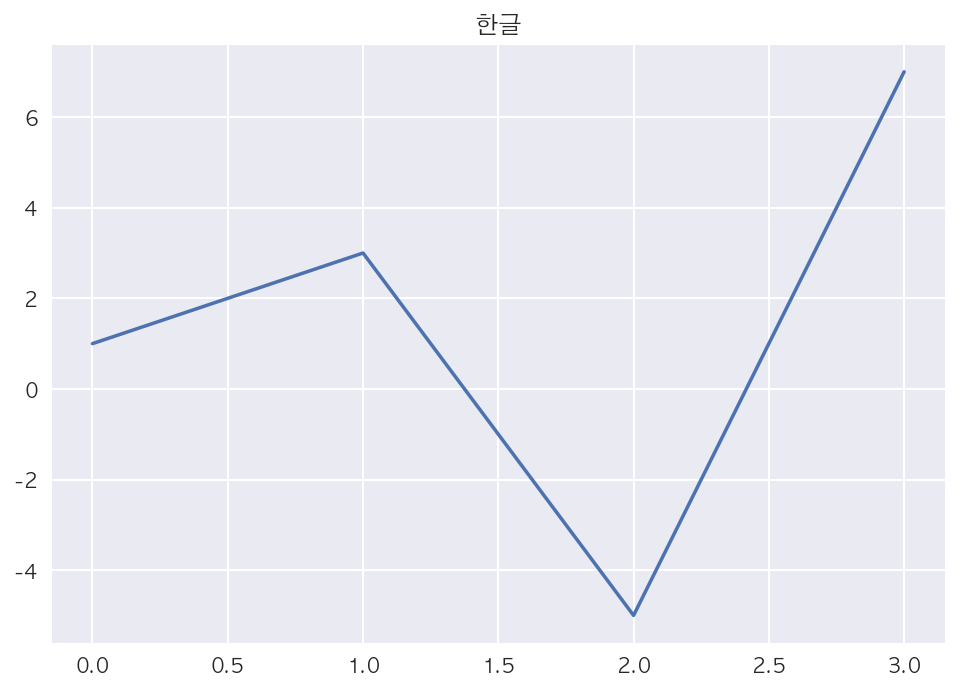

In [39]:
_ = pd.Series([1, 3, -5, 7]).plot(title='한글')

----
#### 폐기물 발생,처리현황 데이터 살펴보기

In [2]:
# 폐기물 발생현황 데이터 가져오기
ocr_raw = pd.read_csv('output/waste_ocr_1920.csv')
ocr_raw.head()

,시도명,2019,2020
0,강원도,681199,667683
1,경기도,3483523,3901516
2,경상남도,1296772,1270196
3,경상북도,863991,903107
4,광주광역시,423473,420659


In [3]:
ocr_raw.tail()

,시도명,2019,2020
12,전라남도,627873,650020
13,전라북도,576006,612062
14,제주특별자치도,350108,417739
15,충청남도,835120,766650
16,충청북도,695726,659454


In [4]:
# 폐기물 처리현황 데이터 가져오기
prs_raw = pd.read_csv('output/waste_prs_1920.csv')
prs_raw.head()

,시도명,처리업체,처리방식,2019,2020
0,서울특별시,공공처리,매립,303169.0,344031.3
1,서울특별시,공공처리,소각,690908.5,730391.5
2,서울특별시,공공처리,재활용,383323.0,379742.3
3,서울특별시,공공처리,기타,0.0,0.0
4,서울특별시,위탁처리,매립,51027.0,1522.0


In [5]:
prs_raw.tail()

,시도명,처리업체,처리방식,2019,2020
199,제주특별자치도,위탁처리,기타,0.0,0.0
200,제주특별자치도,자가처리,매립,0.0,0.0
201,제주특별자치도,자가처리,소각,0.0,0.0
202,제주특별자치도,자가처리,재활용,1752.0,1960.2
203,제주특별자치도,자가처리,기타,0.0,0.0


In [6]:
# shape 살펴보기
ocr_raw.shape, prs_raw.shape

((17, 3), (204, 5))

In [7]:
# 개략적 정보 살펴보기
ocr_raw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17 entries, 0 to 16
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   시도명     17 non-null     object
 1   2019    17 non-null     int64 
 2   2020    17 non-null     int64 
dtypes: int64(2), object(1)
memory usage: 536.0+ bytes


In [8]:
prs_raw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 204 entries, 0 to 203
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   시도명     204 non-null    object 
 1   처리업체    204 non-null    object 
 2   처리방식    204 non-null    object 
 3   2019    204 non-null    float64
 4   2020    204 non-null    float64
dtypes: float64(2), object(3)
memory usage: 8.1+ KB


In [9]:
"""
발생량
1. 19 -> 20년 가면서 평균 2만톤 정도 늘어남
2. max 값은 50만 톤 정도 늘어남
"""

# 수치형 기술통계
# ocr_raw['2020'].describe().apply("{0:.0f}".format)
pd.set_option('display.float_format', lambda x: '%.f' % x) # 부동소수점 표현 없애기
ocr_raw.describe()


,2019,2020
count,17,17
mean,985760,1017846
std,924634,997739
min,118734,117891
25%,469645,498151
50%,695726,667683
75%,937283,938049
max,3483523,3901516


In [10]:
"""
처리량
1. min 값이 0인건
- 년에 하나도 처리하지 않는 업체가 있다는 뜻인가?
- 아니면 해당 카테고리에 속한 업체가 없다는 뜻인가? 없다는 뜻이겠지?
"""

prs_raw.describe()


,2019,2020
count,204,204
mean,82147,84821
std,191868,204561
min,0,0
25%,0,0
50%,1716,519
75%,106115,106222
max,1627280,1648634


In [11]:
# 범주형 기술통계
ocr_raw.describe(include='object')

,시도명
count,17
unique,17
top,강원도
freq,1


In [12]:
prs_raw.describe(include='object')

,시도명,처리업체,처리방식
count,204,204,204
unique,17,3,4
top,서울특별시,공공처리,매립
freq,12,68,51


In [21]:
# 발생량과 처리량이 같은지 확인하기
ocr_raw


,시도명,2019,2020
0,강원도,681199,667683
1,경기도,3483523,3901516
2,경상남도,1296772,1270196
3,경상북도,863991,903107
4,광주광역시,423473,420659
5,대구광역시,937283,938049
6,대전광역시,469645,498151
7,부산광역시,1077115,1148394
8,서울특별시,3160170,3177620
9,세종특별자치시,118734,117891


In [22]:
pd.set_option('display.float_format', None)
prs_raw.groupby(by=['시도명']).sum().astype('int')

,2019,2020
시도명,,
강원도,681199,667683
경기도,3483523,3901516
경상남도,1296772,1270196
경상북도,863991,903107
광주광역시,423473,420659
대구광역시,937283,938049
대전광역시,469645,498151
부산광역시,1077115,1148394
서울특별시,3160170,3177620


In [25]:
# 결측치 살펴보기
ocr_raw.isnull().sum().sum(), prs_raw.isnull().sum().sum()

(0, 0)

In [28]:
# 중복값 살펴보기
ocr_raw.duplicated().sum(), prs_raw.duplicated().sum()

(0, 0)

----
#### 폐기물 발생,처리현황 데이터 시각화

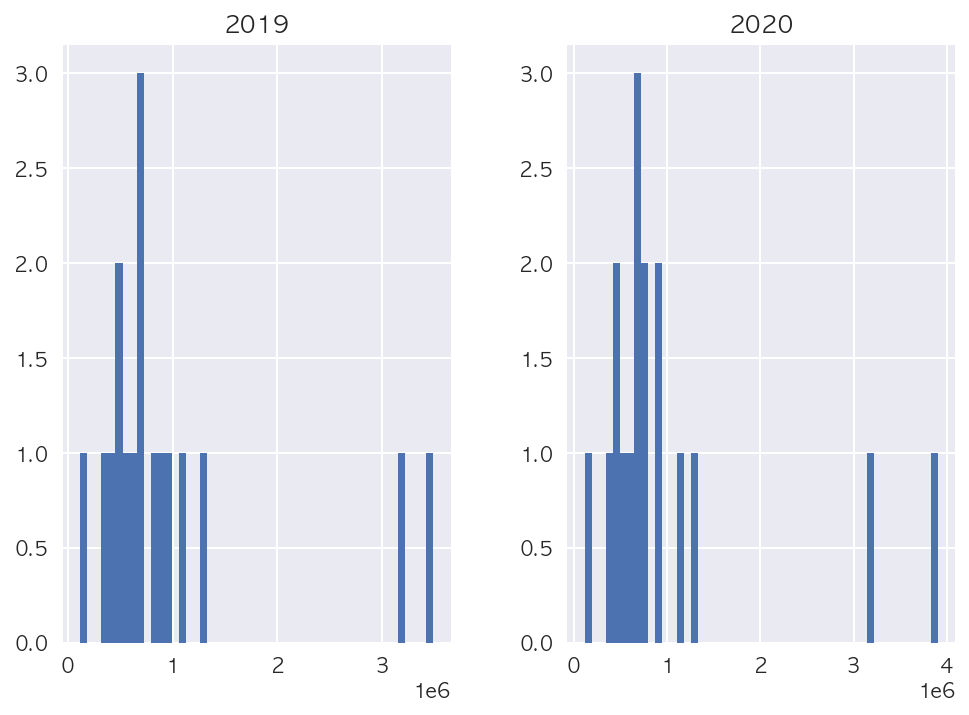

In [37]:
# 히스토그램 그려보기
_ = ocr_raw.hist(bins=50)

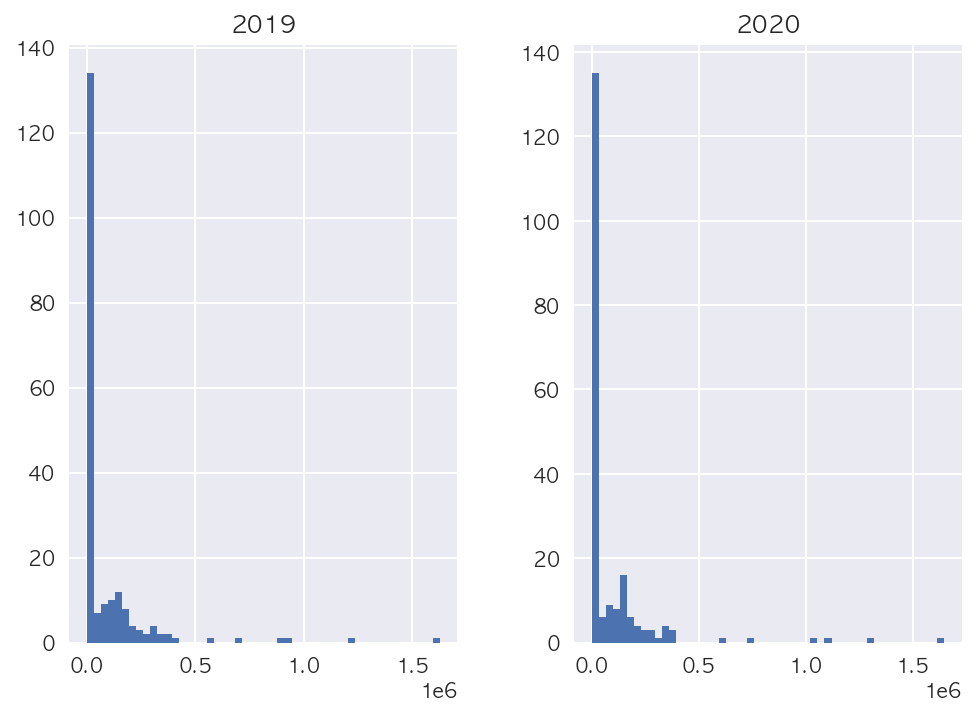

In [41]:
_ = prs_raw.hist(bins=50)

In [42]:
# 지역에 따른 폐기물 발생량
ocr_raw

,시도명,2019,2020
0,강원도,681199,667683
1,경기도,3483523,3901516
2,경상남도,1296772,1270196
3,경상북도,863991,903107
4,광주광역시,423473,420659
5,대구광역시,937283,938049
6,대전광역시,469645,498151
7,부산광역시,1077115,1148394
8,서울특별시,3160170,3177620
9,세종특별자치시,118734,117891


In [390]:
fig = px.histogram(ocr_raw, x='시도명', y=['2019', '2020'],
                histfunc='sum', title='연도별 폐기물 발생량 수',
                barmode='group', text_auto=True,
                width=1000, height=500,
    )
fig.update_traces(
    texttemplate='%{y:,d} 톤',
)
# 증가/하락 나타내기
fig.add_annotation(x=0, y=1, text='<b style="color:blue">하락</b>', showarrow=False, yshift=65)
fig.add_annotation(x=2, y=1, text='<b style="color:blue">하락</b>', showarrow=False, yshift=110)
fig.add_annotation(x=4, y=1, text='<b style="color:blue">하락</b>', showarrow=False, yshift=45)
fig.add_annotation(x=9, y=1, text='<b style="color:blue">하락</b>', showarrow=False, yshift=25)
fig.add_annotation(x=10, y=1, text='<b style="color:blue">하락</b>', showarrow=False, yshift=45)
fig.add_annotation(x=15, y=1, text='<b style="color:blue">하락</b>', showarrow=False, yshift=75)
fig.add_annotation(x=16, y=1, text='<b style="color:blue">하락</b>', showarrow=False, yshift=65)
# fig.add_annotation(
#     x=1, y=1, text='<b style="color:white">증가!</b>', showarrow=False, yshift=310,
#     bordercolor='black', bgcolor='black', borderpad=2)
fig.add_annotation(
    x=1, y=1, text='<b style="color:red">증가!</b>', showarrow=False, yshift=310,)
fig.add_annotation(
    x=3, y=1, text='<b style="color:red">증가!</b>', showarrow=False, yshift=80)
fig.add_annotation(
    x=5, y=1, text='<b style="color:red">증가!</b>', showarrow=False, yshift=85)
fig.add_annotation(
    x=6, y=1, text='<b style="color:red">증가!</b>', showarrow=False, yshift=50)
fig.add_annotation(
    x=7, y=1, text='<b style="color:red">증가!</b>', showarrow=False, yshift=100)
fig.add_annotation(
    x=8, y=1, text='<b style="color:red">증가!</b>', showarrow=False, yshift=255)
fig.add_annotation(
    x=11, y=1, text='<b style="color:red">증가!</b>', showarrow=False, yshift=70)
fig.add_annotation(
    x=12, y=1, text='<b style="color:red">증가!</b>', showarrow=False, yshift=65)
fig.add_annotation(
    x=13, y=1, text='<b style="color:red">증가!</b>', showarrow=False, yshift=60)
fig.add_annotation(
    x=14, y=1, text='<b style="color:red">증가!</b>', showarrow=False, yshift=45)
fig.add_annotation(
    x=1, y=1, showarrow=False, xshift=120, yshift=200,
    text='<b style="color:white">경기도는 심지어 대략 42만톤 증가 📈</b>', bordercolor='black',
    bgcolor='black', borderpad=5
)

fig.update_layout(
    xaxis_title = '시도명',
    yaxis_title = '발생총합'
)
fig.show()

In [94]:
# 지역에 따른 폐기물 처리량
prs_raw.groupby(by=['시도명', '처리업체', '처리방식']).sum().head(20)

2019       2020
시도명 처리업체 처리방식                      
강원도 공공처리 기타       2299.5     2580.7
         매립     205750.5   184571.6
         소각     151000.5   161357.0
         재활용    148007.5   184168.7
    위탁처리 기타        693.5      712.5
         매립         36.5       50.7
         소각       1569.5        0.0
         재활용    163921.5   133434.5
    자가처리 기타          0.0        0.0
         매립          0.0        0.0
         소각          0.0        0.0
         재활용      7920.5      807.8
경기도 공공처리 기타       5621.0        0.0
         매립     264625.0   338026.6
         소각    1222129.5  1312805.1
         재활용    914142.5  1096148.5
    위탁처리 기타       7665.0    13533.3
         매립      76358.0     2147.3
         소각     101141.5    93141.3
         재활용    883957.0  1039095.3

In [271]:
# 처리업체별 처리방식 비율
prs_com_g = prs_raw.groupby(by=['처리업체', '처리방식'], as_index=False).sum()
prs_com_g

,처리업체,처리방식,2019,2020
0,공공처리,기타,23141.0,42231.1
1,공공처리,매립,2328955.5,2405918.7
2,공공처리,소각,4266302.5,4560506.4
3,공공처리,재활용,3868306.5,4155660.3
4,위탁처리,기타,38507.5,14585.8
5,위탁처리,매립,135086.5,18449.1
6,위탁처리,소각,515234.0,498188.3
7,위탁처리,재활용,5547708.0,5583715.3
8,자가처리,기타,401.5,880.1
9,자가처리,매립,985.5,0.0


In [304]:
fig = px.sunburst(prs_com_g, path=['처리업체', '처리방식'],
                  values='2019', title='2019년 전국 폐기물 처리업체별 처리방식 비율')
fig.update_traces(
    textinfo='value+label', textfont={'size': 15},
    texttemplate='<b>%{label}</b><br>%{percentRoot}<br>%{value}', insidetextorientation='horizontal'
)
fig.show()


In [292]:
px.histogram(prs_raw, y='시도명', x='2019', color='처리업체', barmode='group',
            title='2019년 시도별 폐기물 처리업체',
            histfunc='sum',
)


In [278]:
fig = px.sunburst(prs_com_g, path=['처리업체', '처리방식'],
                  values='2020', title='2020년 전국 폐기물 처리업체별 처리방식 비율')
fig.update_traces(
    textinfo='value+label', textfont={'size': 15},
    texttemplate='<b>%{label}</b><br>%{percentRoot}<br>%{value}', insidetextorientation='horizontal'
)
fig.show()


In [287]:
px.histogram(prs_raw, y='시도명', x='2020', color='처리업체', barmode='group',
            histfunc='sum',
            title='2020년 시도별 폐기물 처리업체')


In [301]:
fig = px.histogram(prs_raw, x='시도명', y='2019', color='처리방식',
                title='2019년 시도별 폐기물 처리방식')
fig.update_traces(
    texttemplate='%{y:,d} 톤',
)
fig.update_layout(
    xaxis_title = '시도명',
    yaxis_title = '폐기물 발생량'
)

In [302]:
fig = px.histogram(prs_raw, x='시도명', y='2020', color='처리방식',
                title='2020년 시도별 폐기물 처리방식')
fig.update_traces(
    texttemplate='%{y:,d} 톤',
)
fig.update_layout(
    xaxis_title = '시도명',
    yaxis_title = '폐기물 발생량'
)

In [394]:
# 소각 처리량 시각화
prs_fire = prs_raw[prs_raw['처리방식'] == '소각'].groupby('시도명', as_index=False).sum()
prs_fire

,시도명,2019,2020
0,강원도,152570.0,161357.0
1,경기도,1323709.0,1405946.4
2,경상남도,409676.0,393281.7
3,경상북도,391170.5,456366.9
4,광주광역시,4964.0,13906.1
5,대구광역시,95630.0,90841.7
6,대전광역시,67926.5,49455.7
7,부산광역시,153738.0,162047.7
8,서울특별시,790225.0,797766.1
9,세종특별자치시,31025.0,29390.1


In [398]:
prs_fire_m = prs_fire.melt(id_vars=['시도명'], value_name='소각량', var_name='시점')
prs_fire_m.head()

,시도명,시점,소각량
0,강원도,2019,152570.0
1,경기도,2019,1323709.0
2,경상남도,2019,409676.0
3,경상북도,2019,391170.5
4,광주광역시,2019,4964.0


In [446]:
fig = px.histogram(prs_fire_m, x='시도명', y='소각량', color='시점'
            ,barmode='group', title='연도별 생활폐기물 소각량'
            ,width=1000)
fig.update_traces(
    texttemplate='%{y:,d} 톤',
)
fig.add_annotation(
    x=3, y=1, xshift=150, yshift=200,
    text='<span style="color:white"><b>증가한 도시:</b> 강원, 경기, 경북, 광주, 부산, 서울, 인천, 전남, 전북, 제주, 충남, 충북<span>',
    showarrow=False,
    bgcolor='black', bordercolor='black', borderwidth=3
)
fig.add_annotation(
    x=3, y=1, xshift=47, yshift=170,
    text='<span style="color:white"><b>감소한 도시:</b> 경남, 대구, 대전, 세종, 울산<span>',
    showarrow=False,
    bgcolor='black', bordercolor='black', borderwidth=3
)
fig.show()

In [447]:
# 매립 처리량 시각화
prs_land = prs_raw[prs_raw['처리방식'] == '매립'].groupby('시도명', as_index=False).sum()
prs_land

,시도명,2019,2020
0,강원도,205787.0,184622.3
1,경기도,340983.0,340173.9
2,경상남도,205531.5,220772.3
3,경상북도,138262.0,107134.9
4,광주광역시,189435.0,170417.3
5,대구광역시,178047.0,226671.0
6,대전광역시,76431.0,83539.6
7,부산광역시,36135.0,38610.9
8,서울특별시,354196.0,345553.3
9,세종특별자치시,2847.0,0.0


In [450]:
prs_land_m = prs_land.melt(id_vars=['시도명'], value_name='매립량', var_name='시점')
prs_land_m.head()

,시도명,시점,매립량
0,강원도,2019,205787.0
1,경기도,2019,340983.0
2,경상남도,2019,205531.5
3,경상북도,2019,138262.0
4,광주광역시,2019,189435.0


In [457]:
fig = px.histogram(prs_land_m, x='시도명', y='매립량', color='시점',
                   barmode='group', title='연도별 생활폐기물 매립량', width=1000)
fig.update_traces(
    texttemplate='%{y:,d} 톤',
)
fig.add_annotation(
    x=3, y=1, xshift=70, yshift=200,
    text='<span style="color:white"><b>증가한 도시:</b> 경남, 대구, 대전, 부산, 전북, 충남<span>',
    showarrow=False,
    bgcolor='black', bordercolor='black', borderwidth=3
)
fig.show()


----
#### 관리비용 시각화

In [458]:
# 관리비용 데이터 가져오기
budget_raw = pd.read_csv('output/budget_1920.csv')
budget_raw.head()

,시도명,분류,2019,2020
0,강원도,국비,12122744,23911725
1,강원도,세입수수료,46171000,47846000
2,강원도,지방비,517782926,582499714
3,경기도,국비,3537843,3101540
4,경기도,세입수수료,308633000,366070000


In [460]:
# 관리비용 시점 tidy data 만들기
budget_m = budget_raw.melt(id_vars=['시도명', '분류'], value_name='관리비', var_name='시점')
budget_m.head()

,시도명,분류,시점,관리비
0,강원도,국비,2019,12122744
1,강원도,세입수수료,2019,46171000
2,강원도,지방비,2019,517782926
3,경기도,국비,2019,3537843
4,경기도,세입수수료,2019,308633000


In [472]:
# 전체 분류 차트
px.histogram(budget_raw, x='시도명', y='2019', color='분류',
                title='2019년 시도별 폐기물 관리예산')

In [ ]:
# 관리예산 국비
# budget_na = budget_raw[budget_raw['분류'] == '국비'].groupby('시도명', as_index=False).sum()
# budget_na = budget_na.melt(id_vars=['시도명'], value_name='국비', var_name='시점')
# budget_na.head()

In [593]:
# px.histogram(budget_na, x='시도명', y='국비',color='시점', barmode='group' )


In [511]:
# 관리비용 & 발생량 데이터 시각화하기
# ocr_m = ocr_raw.melt(id_vars=['시도명'], value_name='발생량', var_name='시점')
# ocr_m.head()
ocr_19 = ocr_raw[['시도명', '2019']]
ocr_20 = ocr_raw[['시도명', '2020']]
ocr_20.head()

,시도명,2020
0,강원도,667683
1,경기도,3901516
2,경상남도,1270196
3,경상북도,903107
4,광주광역시,420659


In [505]:
# budget_g_m =  budget_m.groupby(['시도명', '시점'], as_index=False).sum()
# budget_g_m.head()
budget_g = budget_raw.groupby('시도명', as_index=False).sum()
budget_g.head()

,시도명,2019,2020
0,강원도,576076670,654257439
1,경기도,3070568237,3264299736
2,경상남도,762637765,741598261
3,경상북도,705973507,826483954
4,광주광역시,274282001,271466720


In [513]:
budget_g_19 = budget_g[['시도명', '2019']]
budget_g_20 = budget_g[['시도명', '2020']]
budget_g_20.head()

,시도명,2020
0,강원도,654257439
1,경기도,3264299736
2,경상남도,741598261
3,경상북도,826483954
4,광주광역시,271466720


In [517]:
ocr_bg_19 = pd.merge(ocr_19, budget_g_19, on='시도명')
ocr_bg_19 = ocr_bg_19.rename(columns={'2019_x': '발생량', '2019_y': '관리예산'})
ocr_bg_19.head()

,시도명,발생량,관리예산
0,강원도,681199,576076670
1,경기도,3483523,3070568237
2,경상남도,1296772,762637765
3,경상북도,863991,705973507
4,광주광역시,423473,274282001


In [518]:
ocr_bg_20 = pd.merge(ocr_20, budget_g_20, on='시도명')
ocr_bg_20 = ocr_bg_20.rename(columns={'2020_x': '발생량', '2020_y': '관리예산'})
ocr_bg_20.head()

,시도명,발생량,관리예산
0,강원도,667683,654257439
1,경기도,3901516,3264299736
2,경상남도,1270196,741598261
3,경상북도,903107,826483954
4,광주광역시,420659,271466720


In [ ]:
# ocr_bg = pd.merge(ocr_raw, budget_g, on='시도명', suffixes=['_발생량', '_관리비'])
# ocr_bg.head()

In [521]:
ocr_bg_19_m = ocr_bg_19.melt(id_vars=['시도명'], var_name='발생량/관리예산', value_name='2019')
ocr_bg_19_m.head()

,시도명,발생량/관리예산,2019
0,강원도,발생량,681199
1,경기도,발생량,3483523
2,경상남도,발생량,1296772
3,경상북도,발생량,863991
4,광주광역시,발생량,423473


In [581]:
ocr_bg_20_m = ocr_bg_20.melt(id_vars=['시도명'], var_name='발생량/관리예산', value_name='2020')
ocr_bg_20_m.head()

,시도명,발생량/관리예산,2020
0,강원도,발생량,667683
1,경기도,발생량,3901516
2,경상남도,발생량,1270196
3,경상북도,발생량,903107
4,광주광역시,발생량,420659


In [591]:
ocr_colors = ['#636efa'] * len(ocr_raw['시도명'])
bg_colors = ['#ef553b'] * len(ocr_raw['시도명'])
bg_colors[11] = '#00cc96'
bg_colors[14] = '#00cc96'

fig = make_subplots(specs=[[{"secondary_y": True}]])

fig.add_trace(
    go.Bar(
        x=ocr_bg_19_m['시도명'],
        y=(ocr_bg_19_m.loc[ocr_bg_19_m['발생량/관리예산'] == '발생량', '2019']),
        name="발생량",
        offsetgroup=1,
    ),
    secondary_y=False,
)

fig.add_trace(
    go.Bar(
        x=ocr_bg_19_m['시도명'],
        y=(ocr_bg_19_m.loc[ocr_bg_19_m['발생량/관리예산'] == '관리예산', '2019']),
        name="관리예산",
        offsetgroup=2,
        marker_color=bg_colors
    ),
    secondary_y=True,
)

fig.update_layout(
    title_text="2019년 폐기물 발생량 및 관리예산 추이",
    xaxis_tickangle=-45,
    barmode='group'
)

fig.update_xaxes(title_text="xaxis title")

fig.update_yaxes(title_text="<b>발생량</b>(톤)", secondary_y=False)
fig.update_yaxes(title_text="<b>관리예산</b>(천원)", secondary_y=True)

fig.add_annotation(x=1, y=1, yshift=250,
                   text='<b>Max !</b>',
                   showarrow=False)
fig.add_annotation(x=11, y=1, xshift=25, yshift=70,
                   text='<b style="color:white"> 관리예산이 더 높은 곳 💰</b>',
                   showarrow=False, bordercolor='black', borderpad=2, bgcolor='black')
fig.show()


In [587]:
ocr_colors = ['#636efa'] * len(ocr_raw['시도명'])
bg_colors = ['#ef553b'] * len(ocr_raw['시도명'])
bg_colors[0] = '#00cc96'
bg_colors[3] = '#00cc96'
bg_colors[11] = '#00cc96'
bg_colors[14] = '#00cc96'

fig = make_subplots(specs=[[{"secondary_y": True}]])

fig.add_trace(
    go.Bar(x=ocr_bg_20_m['시도명'], y=(ocr_bg_20_m.loc[ocr_bg_20_m['발생량/관리예산'] == '발생량', '2020']),
    name="발생량", offsetgroup=1,),
    secondary_y=False,
)

fig.add_trace(
    go.Bar(x=ocr_bg_20_m['시도명'], y=(ocr_bg_20_m.loc[ocr_bg_20_m['발생량/관리예산'] == '관리예산', '2020']),
           name="관리예산", offsetgroup=2, marker_color=bg_colors),
    secondary_y=True,
)

fig.update_layout(
    title_text="2020년 폐기물 발생량 및 관리예산 추이",
    xaxis_tickangle=-45,
    # width=1600,
    barmode='group'
)

fig.update_xaxes(title_text="xaxis title")

fig.update_yaxes(title_text="<b>발생량</b>(톤)", secondary_y=False)
fig.update_yaxes(title_text="<b>관리예산</b>(천원)", secondary_y=True)

fig.add_annotation(x=1, y=1, yshift=250,
                    text='<b>Max !</b>',
                    showarrow=False)
fig.add_annotation(x=11, y=1, xshift=30, yshift=90,
                    text='<b style="color:white"> 관리예산이 더 높은 곳 💰</b>',
                    showarrow=False, bordercolor='black', borderpad=2, bgcolor='black')
fig.show()


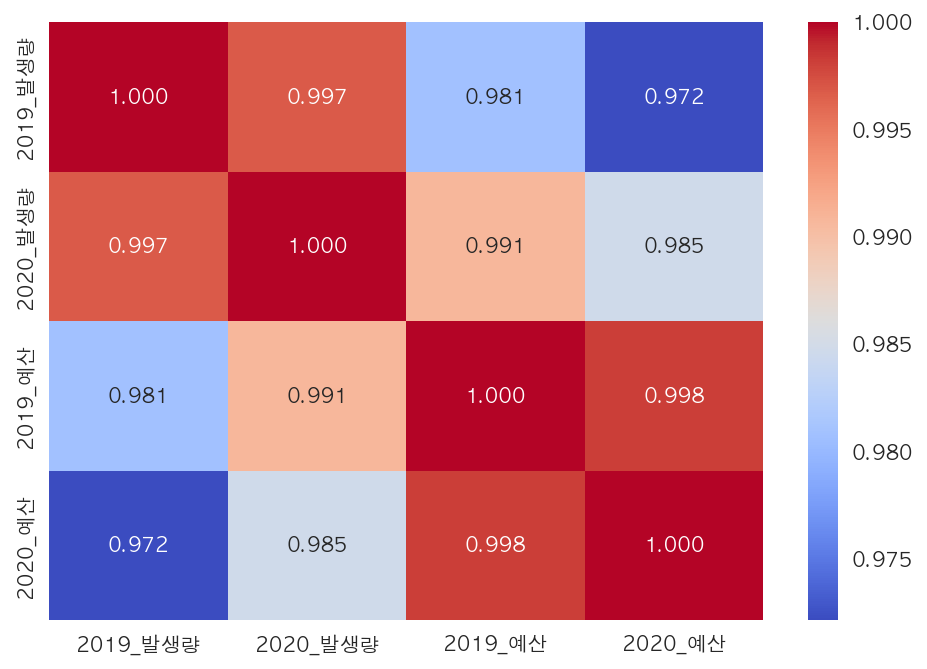

In [491]:
# 관리예산과 발생량 상관관계
_ = sns.heatmap(ocr_bg.corr(), cmap='coolwarm', annot=True, fmt='.3f')

----
#### 관리구역 정보 시각화

In [594]:
info_raw = pd.read_csv('output/info_1920.csv')
info_raw.head()

,시도명,구역,항목,2019,2020
0,서울특별시,전체 행정구역,면적 (km²),605,605
1,서울특별시,전체 행정구역,인구 (명),9993743,9911088
2,서울특별시,전체 행정구역,동(읍·면)수 (개),424,425
3,서울특별시,전체 행정구역,세대수 (가구),4327605,4417954
4,서울특별시,생활폐기물 관리구역,면적 (km²),605,605


In [995]:
info_raw['구역'].unique()

array(['전체 행정구역', '생활폐기물 관리구역', '생활폐기물 관리제외지역'], dtype=object)

In [1002]:
info_raw = info_raw[~(info_raw['구역'] == '생활폐기물 관리제외지역')]
info_raw = info_raw[info_raw['항목'].isin(['면적 (km²)', '인구 (명)'])]
info_raw.tail()

,시도명,구역,항목,2019,2020
185,경상남도,생활폐기물 관리구역,인구 (명),3434980,3404370
192,제주특별자치도,전체 행정구역,면적 (km²),1850,1850
193,제주특별자치도,전체 행정구역,인구 (명),696657,697578
196,제주특별자치도,생활폐기물 관리구역,면적 (km²),1850,1850
197,제주특별자치도,생활폐기물 관리구역,인구 (명),696657,697578


In [1005]:
info_m = info_raw.melt(id_vars=['시도명', '구역', '항목'], var_name='시점', value_name='수치')
info_m

,시도명,구역,항목,시점,수치
0,서울특별시,전체 행정구역,면적 (km²),2019,605
1,서울특별시,전체 행정구역,인구 (명),2019,9993743
2,서울특별시,생활폐기물 관리구역,면적 (km²),2019,605
3,서울특별시,생활폐기물 관리구역,인구 (명),2019,9993743
4,부산광역시,전체 행정구역,면적 (km²),2019,770
...,...,...,...,...,...
131,경상남도,생활폐기물 관리구역,인구 (명),2020,3404370
132,제주특별자치도,전체 행정구역,면적 (km²),2020,1850
133,제주특별자치도,전체 행정구역,인구 (명),2020,697578
134,제주특별자치도,생활폐기물 관리구역,면적 (km²),2020,1850


In [1011]:
# 폐기물 발생량과 인구와의 상관관계
info_pop = info_m[(info_m['구역'] == '전체 행정구역') &(info_m['항목'] == '인구 (명)')]
info_pop = info_pop[['시도명', '시점', '수치']].rename(columns={'수치':'인구수'})
info_pop.head()

,시도명,시점,인구수
1,서울특별시,2019,9993743
5,부산광역시,2019,3459840
9,대구광역시,2019,2468222
13,인천광역시,2019,3029285
17,광주광역시,2019,1480293


In [1013]:
info_pop.shape, ocr_m.shape

((34, 3), (34, 3))

In [1014]:
ocr_info_pop = pd.merge(info_pop, ocr_m)
ocr_info_pop.shape

(34, 4)

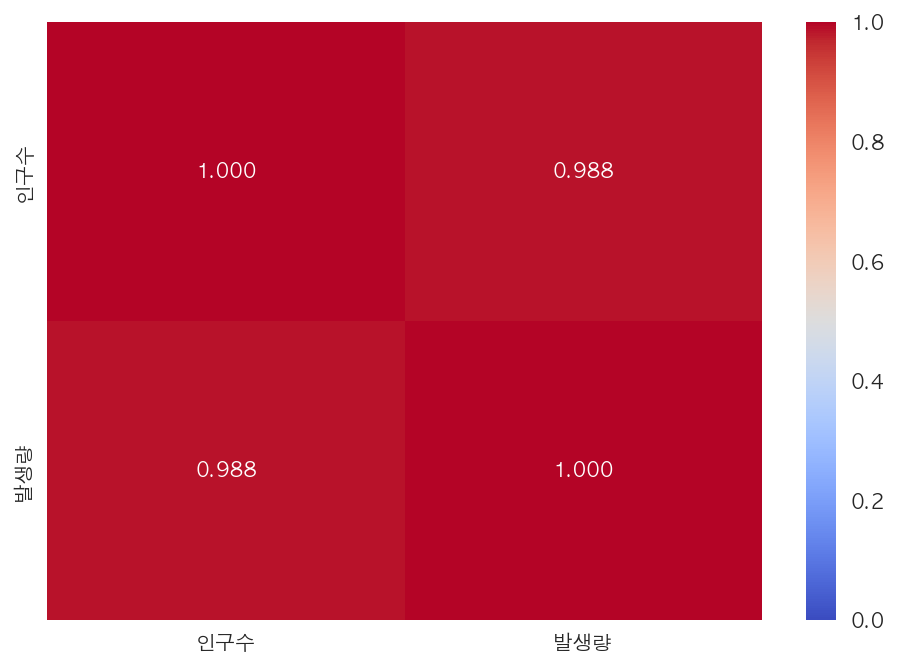

In [1019]:
_ = sns.heatmap(ocr_info_pop.corr(), cmap='coolwarm',
                annot=True, fmt='.3f', vmin=0, vmax=1)

In [1038]:
ocr_info_pop_19 = ocr_info_pop[ocr_info_pop['시점'] == '2019']
ocr_info_pop_19 = ocr_info_pop_19.sort_values(['인구수', '발생량'])
ocr_info_pop_19.head()



,시도명,시점,인구수,발생량
7,세종특별자치시,2019,346275,118734
16,제주특별자치도,2019,696657,350108
6,울산광역시,2019,1168469,462637
4,광주광역시,2019,1480293,423473
5,대전광역시,2019,1493979,469645


In [1041]:
ocr_info_pop_20 = ocr_info_pop[ocr_info_pop['시점'] == '2020']
ocr_info_pop_20 = ocr_info_pop_20.sort_values(['인구수', '발생량'])
ocr_info_pop_20.head()

,시도명,시점,인구수,발생량
24,세종특별자치시,2020,360907,117891
33,제주특별자치도,2020,697578,417739
23,울산광역시,2020,1153901,422336
21,광주광역시,2020,1471385,420659
22,대전광역시,2020,1480777,498151


In [1042]:
fig = make_subplots(specs=[[{"secondary_y": True}]])

fig.add_trace(
    go.Bar(
        x=ocr_info_pop_20['시도명'],
        y=ocr_info_pop_20['인구수'],
        name="인구수",
        offsetgroup=1,
    ),
    secondary_y=False,
)

fig.add_trace(
    go.Bar(
        x=ocr_info_pop_20['시도명'],
        y=ocr_info_pop_20['발생량'],
        name="발생량",
        offsetgroup=2,
    ),
    secondary_y=True,
)

fig.update_layout(
    title_text="2020년 시도별 인구수와 생활폐기물 발생량 추이",
    xaxis_tickangle=-45,
    barmode='group'
)

fig.update_xaxes(title_text="시도명")

fig.update_yaxes(title_text="<b>인구수</b>(명)", secondary_y=False)
fig.update_yaxes(title_text="<b>발생량</b>(톤)", secondary_y=True)

fig.show()


In [1021]:
# 발생량과 면적과의 관계
info_area = info_m[(info_m['구역'] == '전체 행정구역') &(info_m['항목'] == '면적 (km²)')]
info_area = info_area[['시도명', '시점', '수치']].rename(columns={'수치':'면적(km²)'})
info_area.head()

,시도명,시점,면적(km²)
0,서울특별시,2019,605
4,부산광역시,2019,770
8,대구광역시,2019,883
12,인천광역시,2019,1063
16,광주광역시,2019,501


In [1022]:
info_area.shape, ocr_m.shape

((34, 3), (34, 3))

In [1023]:
ocr_info_area = pd.merge(info_area, ocr_m)
ocr_info_area.shape

(34, 4)

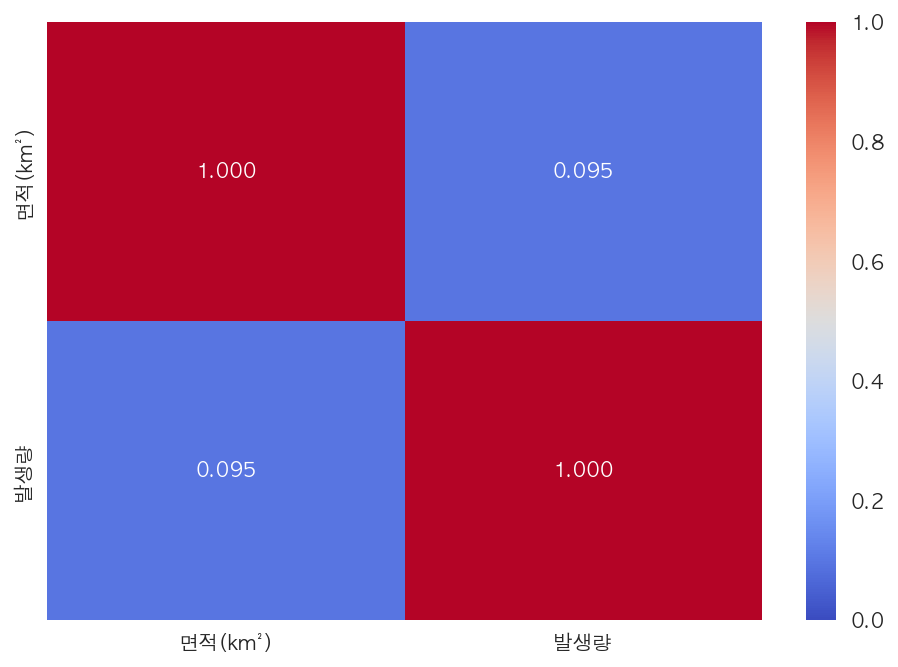

In [1025]:
_ = sns.heatmap(ocr_info_area.corr(), cmap='coolwarm',
                annot=True, fmt='.3f', vmin=0, vmax=1)

In [1050]:
ocr_info_area_20 = ocr_info_area[ocr_info_area['시점'] == '2020']
ocr_info_area_20 = ocr_info_area_20.sort_values(['면적(km²)', '발생량', ])
ocr_info_area_20.head()

,시도명,시점,면적(km²),발생량
24,세종특별자치시,2020,464,117891
21,광주광역시,2020,501,420659
22,대전광역시,2020,539,498151
17,서울특별시,2020,605,3177620
18,부산광역시,2020,770,1148394


In [1065]:
fig = make_subplots(specs=[[{"secondary_y": True}]])

fig.add_trace(
    go.Bar(
        x=ocr_info_area_20['시도명'],
        y=ocr_info_area_20['면적(km²)'],
        name="면적(km²)",
        offsetgroup=1,
    ),
    secondary_y=False,
)

fig.add_trace(
    go.Bar(
        x=ocr_info_area_20['시도명'],
        y=ocr_info_area_20['발생량'],
        name="발생량",
        offsetgroup=2,
    ),
    secondary_y=True,
)

fig.update_layout(
    title_text="2020년 시도별 면적과 생활폐기물 발생량 추이",
    xaxis_tickangle=-45,
    barmode='group'
)

fig.update_xaxes(title_text="시도명")

fig.update_yaxes(title_text="<b>면적</b>(km²)", secondary_y=False)
fig.update_yaxes(title_text="<b>발생량</b>(톤)", secondary_y=True)
fig.add_hline(y=5000, line_width=1, line_dash='dash', line_color='red',
            annotation_text='폐기물 발생량 백만톤', annotation_position='bottom left')
fig.show()


In [1066]:
info_m

,시도명,구역,항목,시점,수치
0,서울특별시,전체 행정구역,면적 (km²),2019,605
1,서울특별시,전체 행정구역,인구 (명),2019,9993743
2,서울특별시,생활폐기물 관리구역,면적 (km²),2019,605
3,서울특별시,생활폐기물 관리구역,인구 (명),2019,9993743
4,부산광역시,전체 행정구역,면적 (km²),2019,770
...,...,...,...,...,...
131,경상남도,생활폐기물 관리구역,인구 (명),2020,3404370
132,제주특별자치도,전체 행정구역,면적 (km²),2020,1850
133,제주특별자치도,전체 행정구역,인구 (명),2020,697578
134,제주특별자치도,생활폐기물 관리구역,면적 (km²),2020,1850


----
#### 소각시설 정보 데이터


In [947]:
# 소각시설 데이터 가져오기
fire_raw = pd.read_csv('output/fire_1920.csv')
fire_raw.head()

,시도명,시점,소각시설수,처리량(톤),국비(백만원),지방비(백만원),유지관리비(백만원/년),관리인원,에너지이용(Gcal)
0,서울특별시,2019,5,713757,61302,314935,66693,315,1535848
1,서울특별시,2020,5,716241,61302,314935,79500,315,1560095
2,부산광역시,2019,2,156891,20542,59729,13837,68,333766
3,부산광역시,2020,2,144250,20542,59729,13859,70,331442
4,대구광역시,2019,1,81294,8201,55897,9081,49,169238


In [948]:
fire_g = fire_raw.groupby(['시도명', '시점'], as_index=False).sum()[['시도명', '시점', '소각시설수']]
fire_g.head()


,시도명,시점,소각시설수
0,강원도,2019,15
1,강원도,2020,15
2,경기도,2019,27
3,경기도,2020,30
4,경상남도,2019,17


In [954]:
fire_g = fire_g.sort_values(['소각시설수', '시점'], ascending=[False, True])
px.histogram(fire_g, x='시도명', y='소각시설수', color='시점',
             barmode='group', title='연도별 시도에 따른 소각시설 수')


In [771]:
prs_fire_m.dtypes, fire_g.dtypes


(시도명     object
 시점      object
 소각량    float64
 dtype: object,
 시도명      object
 시점        int64
 소각시설수     int64
 dtype: object)

In [772]:
fire_g['시점'] = fire_g['시점'].astype('object')
fire_g.dtypes

시도명      object
시점       object
소각시설수     int64
dtype: object

In [773]:
prs_fire_m.shape, fire_g.shape


((34, 3), (32, 3))

In [774]:
# 광주광역시가 소각량 데이터에 없다.
len(fire_g['시도명'].unique()), len(prs_fire_m['시도명'].unique())


(16, 17)

In [775]:
new_fire = [
    {
        '시도명' : '광주광역시',
        '시점' : 2019,
        '소각시설수' : 0
    },
    {
        '시도명' : '광주광역시',
        '시점' : 2020,
        '소각시설수' : 0
    },
]
fire_g = fire_g.append(new_fire, ignore_index=True, )
fire_g.tail()

/var/folders/21/dvhd5rm144sbp9s362bjvx400000gn/T/ipykernel_62051/3236850263.py:13: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.



,시도명,시점,소각시설수
29,충청남도,2020,11
30,충청북도,2019,10
31,충청북도,2020,11
32,광주광역시,2019,0
33,광주광역시,2020,0


In [776]:
set(fire_g['시도명'].unique().tolist()) == set(prs_fire_m['시도명'].unique().tolist())

True

In [777]:
fire_g['시점'].unique(), prs_fire_m['시점'].unique()

(array([2019, 2020], dtype=object), array(['2019', '2020'], dtype=object))

In [779]:
fire_g.loc[fire_g['시점'] == 2019, '시점'] = fire_g.loc[fire_g['시점'] == 2019, '시점'].replace(2019, '2019')
fire_g.loc[fire_g['시점'] == 2020, '시점'] = fire_g.loc[fire_g['시점'] == 2020, '시점'].replace(2020, '2020')
fire_g['시점'].unique()


array(['2019', '2020'], dtype=object)

In [780]:
# 소각시설수, 소각량
prs_fire_g = pd.merge(prs_fire_m, fire_g,)
prs_fire_g.tail()

,시도명,시점,소각량,소각시설수
29,전라남도,2020,137129.0,53
30,전라북도,2020,180143.7,3
31,제주특별자치도,2020,136694.6,6
32,충청남도,2020,380293.1,11
33,충청북도,2020,273847.5,11


In [790]:
prs_fire_g_19 = prs_fire_g[prs_fire_g['시점'] == '2019'].drop(columns='시점')
prs_fire_g_20 = prs_fire_g[prs_fire_g['시점'] == '2020'].drop(columns='시점')
prs_fire_g_20.tail()


,시도명,소각량,소각시설수
29,전라남도,137129.0,53
30,전라북도,180143.7,3
31,제주특별자치도,136694.6,6
32,충청남도,380293.1,11
33,충청북도,273847.5,11


In [792]:
prs_fire_m_19 = prs_fire_g_19.melt(
    id_vars=['시도명',], var_name='소각량/소각시설수', value_name='2019')
prs_fire_m_19.head()


,시도명,소각량/소각시설수,2019
0,강원도,소각량,152570.0
1,경기도,소각량,1323709.0
2,경상남도,소각량,409676.0
3,경상북도,소각량,391170.5
4,광주광역시,소각량,4964.0


In [793]:
prs_fire_m_20 = prs_fire_g_20.melt(
    id_vars=['시도명',], var_name='소각량/소각시설수', value_name='2020')
prs_fire_m_20.head()

,시도명,소각량/소각시설수,2020
0,강원도,소각량,161357.0
1,경기도,소각량,1405946.4
2,경상남도,소각량,393281.7
3,경상북도,소각량,456366.9
4,광주광역시,소각량,13906.1


In [920]:
bg_colors = ['#ef553b'] * len(ocr_raw['시도명'])
# bg_colors[0] = '#fecb52'
bg_colors[0] = '#fecb52'
bg_colors[2] = '#fecb52'
bg_colors[3] = '#fecb52'
bg_colors[11] = '#fecb52'
bg_colors[12] = '#fecb52'
bg_colors[14] = '#fecb52'

fig = make_subplots(specs=[[{"secondary_y": True}]])

fig.add_trace(
    go.Bar(x=prs_fire_m_19['시도명'], y=(prs_fire_m_19.loc[prs_fire_m_19['소각량/소각시설수'] == '소각량', '2019']),
    name="소각량", offsetgroup=1,),
    secondary_y=False,
)

fig.add_trace(
    go.Bar(x=prs_fire_m_19['시도명'], y=(prs_fire_m_19.loc[prs_fire_m_19['소각량/소각시설수'] == '소각시설수', '2019']),
           name="소각시설", offsetgroup=2, marker_color=bg_colors),
    secondary_y=True,
)

fig.update_layout(
    title_text="2019년 폐기물 소각량 및 소각시설 추이",
    xaxis_tickangle=-45,
    barmode='group'
)

fig.update_xaxes(title_text="시도명")

fig.update_yaxes(title_text="<b>소각량</b>(톤)", secondary_y=False)
fig.update_yaxes(title_text="<b>소각시설</b>(개소)", secondary_y=True)

# fig.add_annotation(x=1, y=1, yshift=250,
#                     text='<b>Max !</b>',
#                     showarrow=False)
# fig.add_annotation(x=11, y=1, xshift=30, yshift=90,
#                     text='<b style="color:white"> 소각시설이 더 높은 곳 💰</b>',
#                     showarrow=False, bordercolor='black', borderpad=2, bgcolor='black')
fig.show()


In [933]:
bg_colors = ['#ef553b'] * len(ocr_raw['시도명'])
# bg_colors[0] = '#fecb52'
bg_colors[0] = '#fecb52'
bg_colors[2] = '#fecb52'
bg_colors[3] = '#fecb52'
bg_colors[11] = '#fecb52'
bg_colors[12] = '#fecb52'
bg_colors[14] = '#fecb52'
bg_colors[16] = '#fecb52'

fig = make_subplots(specs=[[{"secondary_y": True}]])

fig.add_trace(
    go.Bar(x=prs_fire_m_20['시도명'], y=(prs_fire_m_20.loc[prs_fire_m_20['소각량/소각시설수'] == '소각량', '2020']),
    name="소각량", offsetgroup=1,),
    secondary_y=False,
)

fig.add_trace(
    go.Bar(x=prs_fire_m_20['시도명'], y=(prs_fire_m_20.loc[prs_fire_m_20['소각량/소각시설수'] == '소각시설수', '2020']),
           name="소각시설", offsetgroup=2,
           marker_color=bg_colors,
           text=(prs_fire_m_20.loc[prs_fire_m_20['소각량/소각시설수'] == '소각시설수', '2020'])),
    secondary_y=True,
)

fig.update_layout(
    title_text="2020년 폐기물 소각량 및 소각시설 추이",
    xaxis_tickangle=-45,
    barmode='group'
)

fig.update_xaxes(title_text="시도명")

fig.update_yaxes(title_text="<b>소각량</b>(톤)", secondary_y=False)
fig.update_yaxes(title_text="<b>소각시설</b>(개소)", secondary_y=True)

# fig.add_annotation(x=1, y=1, yshift=250,
#                     text='<b>Max !</b>',
#                     showarrow=False)
# fig.add_annotation(x=11, y=1, xshift=30, yshift=90,
#                     text='<b style="color:white"> 소각시설이 더 높은 곳 💰</b>',
#                     showarrow=False, bordercolor='black', borderpad=2, bgcolor='black')
fig.show()


In [855]:
prs_fire_top_sido_19 = prs_fire_m_19[prs_fire_m_19['소각량/소각시설수'] == '소각량']\
                .sort_values('2019', ascending=False).head(4)['시도명']
prs_fire_top_sido_19


1      경기도
8    서울특별시
2     경상남도
3     경상북도
Name: 시도명, dtype: object

In [857]:
prs_fire_top_19 = prs_fire_m_19[prs_fire_m_19['시도명'].isin(prs_fire_top_sido_19)].sort_values('2019', ascending=False)
prs_fire_top_19

,시도명,소각량/소각시설수,2019
1,경기도,소각량,1323709.0
8,서울특별시,소각량,790225.0
2,경상남도,소각량,409676.0
3,경상북도,소각량,391170.5
18,경기도,소각시설수,27.0
20,경상북도,소각시설수,18.0
19,경상남도,소각시설수,17.0
25,서울특별시,소각시설수,5.0


In [858]:
prs_fire_bot_sido_19 = prs_fire_m_19[prs_fire_m_19['소각량/소각시설수'] == '소각시설수']\
                .sort_values('2019', ascending=False).head(4)['시도명']
prs_fire_bot_sido_19


29    전라남도
18     경기도
20    경상북도
19    경상남도
Name: 시도명, dtype: object

In [859]:
prs_fire_bot_19 = prs_fire_m_19[prs_fire_m_19['시도명'].isin(
    prs_fire_bot_sido_19)].sort_values('2019', ascending=False)
prs_fire_bot_19


,시도명,소각량/소각시설수,2019
1,경기도,소각량,1323709.0
2,경상남도,소각량,409676.0
3,경상북도,소각량,391170.5
12,전라남도,소각량,122384.5
29,전라남도,소각시설수,53.0
18,경기도,소각시설수,27.0
20,경상북도,소각시설수,18.0
19,경상남도,소각시설수,17.0


In [895]:
prs_fire_5_19 = pd.concat([prs_fire_top_19, prs_fire_bot_19]).drop_duplicates()
prs_fire_5_19 = prs_fire_5_19.groupby(['시도명', '소각량/소각시설수'], as_index=False).sum()
prs_fire_5_19

,시도명,소각량/소각시설수,2019
0,경기도,소각량,1323709.0
1,경기도,소각시설수,27.0
2,경상남도,소각량,409676.0
3,경상남도,소각시설수,17.0
4,경상북도,소각량,391170.5
5,경상북도,소각시설수,18.0
6,서울특별시,소각량,790225.0
7,서울특별시,소각시설수,5.0
8,전라남도,소각량,122384.5
9,전라남도,소각시설수,53.0


In [903]:
prs_fire_5_19_f = prs_fire_5_19[prs_fire_5_19['소각량/소각시설수'] == '소각량']
prs_fire_5_19_f = prs_fire_5_19_f.sort_values('2019', ascending=False)
prs_fire_5_19_f


,시도명,소각량/소각시설수,2019
0,경기도,소각량,1323709.0
6,서울특별시,소각량,790225.0
2,경상남도,소각량,409676.0
4,경상북도,소각량,391170.5
8,전라남도,소각량,122384.5


In [908]:
prs_fire_5_19_f['시도명'].to_list()

['경기도', '서울특별시', '경상남도', '경상북도', '전라남도']

In [913]:
prs_fire_5_19_c = prs_fire_5_19[prs_fire_5_19['소각량/소각시설수'] == '소각시설수']
prs_fire_5_19_c = prs_fire_5_19_c.set_index('시도명').reindex(prs_fire_5_19_f['시도명'].to_list())
prs_fire_5_19_c = prs_fire_5_19_c.reset_index()
prs_fire_5_19_c


,시도명,소각량/소각시설수,2019
0,경기도,소각시설수,27.0
1,서울특별시,소각시설수,5.0
2,경상남도,소각시설수,17.0
3,경상북도,소각시설수,18.0
4,전라남도,소각시설수,53.0


In [934]:
fig = make_subplots(specs=[[{"secondary_y": True}]])

fig.add_trace(
    go.Bar(
        x=prs_fire_5_19_f['시도명'],
        y=(prs_fire_5_19_f.loc[prs_fire_5_19_f['소각량/소각시설수'] == '소각량', '2019']),
        name="소각량", offsetgroup=1,),
    secondary_y=False,
)

fig.add_trace(
    go.Bar(
        x=prs_fire_5_19_c['시도명'],
        y=(prs_fire_5_19_c.loc[prs_fire_5_19_c['소각량/소각시설수'] == '소각시설수', '2019']),
        name="소각시설수", offsetgroup=2,),
    secondary_y=True,
)

fig.update_layout(
    title_text="2019년 폐기물 소각량 및 소각시설 Top4 추이",
    xaxis_tickangle=-45,
    barmode='group'
)

fig.update_xaxes(title_text="시도명")

fig.update_yaxes(title_text="<b>소각량</b>(톤)", secondary_y=False)
fig.update_yaxes(title_text="<b>소각시설수</b>(개소)", secondary_y=True)

# fig.add_annotation(x=1, y=1, yshift=250,
#                     text='<b>Max !</b>',
#                     showarrow=False)
# fig.add_annotation(x=11, y=1, xshift=30, yshift=90,
#                     text='<b style="color:white"> 소각시설이 더 높은 곳 💰</b>',
#                     showarrow=False, bordercolor='black', borderpad=2, bgcolor='black')
fig.show()


In [922]:
prs_fire_top_sido_20 = prs_fire_m_20[prs_fire_m_20['소각량/소각시설수'] == '소각량']\
                .sort_values('2020', ascending=False).head(4)['시도명']
prs_fire_top_sido_20


1      경기도
8    서울특별시
3     경상북도
2     경상남도
Name: 시도명, dtype: object

In [923]:
prs_fire_top_20 = prs_fire_m_20[prs_fire_m_20['시도명'].isin(prs_fire_top_sido_20)].sort_values('2020', ascending=False)
prs_fire_top_20

,시도명,소각량/소각시설수,2020
1,경기도,소각량,1405946.4
8,서울특별시,소각량,797766.1
3,경상북도,소각량,456366.9
2,경상남도,소각량,393281.7
18,경기도,소각시설수,30.0
20,경상북도,소각시설수,18.0
19,경상남도,소각시설수,17.0
25,서울특별시,소각시설수,5.0


In [924]:
prs_fire_bot_sido_20 = prs_fire_m_20[prs_fire_m_20['소각량/소각시설수'] == '소각시설수']\
                .sort_values('2020', ascending=False).head(4)['시도명']
prs_fire_bot_sido_20


29    전라남도
18     경기도
20    경상북도
19    경상남도
Name: 시도명, dtype: object

In [925]:
prs_fire_bot_20 = prs_fire_m_20[prs_fire_m_20['시도명'].isin(
    prs_fire_bot_sido_20)].sort_values('2020', ascending=False)
prs_fire_bot_20


,시도명,소각량/소각시설수,2020
1,경기도,소각량,1405946.4
3,경상북도,소각량,456366.9
2,경상남도,소각량,393281.7
12,전라남도,소각량,137129.0
29,전라남도,소각시설수,53.0
18,경기도,소각시설수,30.0
20,경상북도,소각시설수,18.0
19,경상남도,소각시설수,17.0


In [926]:
prs_fire_5_20 = pd.concat([prs_fire_top_20, prs_fire_bot_20]).drop_duplicates()
prs_fire_5_20 = prs_fire_5_20.groupby(['시도명', '소각량/소각시설수'], as_index=False).sum()
prs_fire_5_20

,시도명,소각량/소각시설수,2020
0,경기도,소각량,1405946.4
1,경기도,소각시설수,30.0
2,경상남도,소각량,393281.7
3,경상남도,소각시설수,17.0
4,경상북도,소각량,456366.9
5,경상북도,소각시설수,18.0
6,서울특별시,소각량,797766.1
7,서울특별시,소각시설수,5.0
8,전라남도,소각량,137129.0
9,전라남도,소각시설수,53.0


In [927]:
prs_fire_5_20_f = prs_fire_5_20[prs_fire_5_20['소각량/소각시설수'] == '소각량']
prs_fire_5_20_f = prs_fire_5_20_f.sort_values('2020', ascending=False)
prs_fire_5_20_f


,시도명,소각량/소각시설수,2020
0,경기도,소각량,1405946.4
6,서울특별시,소각량,797766.1
4,경상북도,소각량,456366.9
2,경상남도,소각량,393281.7
8,전라남도,소각량,137129.0


In [928]:
prs_fire_5_20_c = prs_fire_5_20[prs_fire_5_20['소각량/소각시설수'] == '소각시설수']
prs_fire_5_20_c = prs_fire_5_20_c.set_index('시도명').reindex(prs_fire_5_20_f['시도명'].to_list())
prs_fire_5_20_c = prs_fire_5_20_c.reset_index()
prs_fire_5_20_c


,시도명,소각량/소각시설수,2020
0,경기도,소각시설수,30.0
1,서울특별시,소각시설수,5.0
2,경상북도,소각시설수,18.0
3,경상남도,소각시설수,17.0
4,전라남도,소각시설수,53.0


In [929]:
fig = make_subplots(specs=[[{"secondary_y": True}]])

fig.add_trace(
    go.Bar(
        x=prs_fire_5_20_f['시도명'],
        y=(prs_fire_5_20_f.loc[prs_fire_5_20_f['소각량/소각시설수'] == '소각량', '2020']),
        name="소각량", offsetgroup=1,),
    secondary_y=False,
)

fig.add_trace(
    go.Bar(
        x=prs_fire_5_20_c['시도명'],
        y=(prs_fire_5_20_c.loc[prs_fire_5_20_c['소각량/소각시설수'] == '소각시설수', '2020']),
        name="소각시설수", offsetgroup=2,),
    secondary_y=True,
)

fig.update_layout(
    title_text="2020년 폐기물 소각량 및 소각시설 Top4 추이",
    xaxis_tickangle=-45,
    barmode='group'
)

fig.update_xaxes(title_text="시도명")

fig.update_yaxes(title_text="<b>소각량</b>(톤)", secondary_y=False)
fig.update_yaxes(title_text="<b>소각시설수</b>(개소)", secondary_y=True)

fig.show()


----
#### 매립시설 시각화

In [938]:
land_raw = pd.read_csv('output/land_1920.csv')
land_raw.head()

,시도명,시점,매립시설수,기매립량(m³),매립량(톤),국비(백만원),지방비(백만원),유지관리비(백만원/년),관리인원
0,부산광역시,2019,1,15566090,232256,88663,275139,4914,31
1,부산광역시,2020,1,15872690,229270,88663,275139,4544,33
2,대구광역시,2019,1,12971602,322243,19591,195303,8634,52
3,대구광역시,2020,1,13366674,347794,19591,195303,8634,52
4,인천광역시,2019,5,156889120,2879634,2386,499183,459971,350


In [939]:
land_g = land_raw.groupby(['시도명', '시점'], as_index=False).sum()[['시도명', '시점', '매립시설수']]
land_g.head()


,시도명,시점,매립시설수
0,강원도,2019,24
1,강원도,2020,24
2,경기도,2019,9
3,경기도,2020,9
4,경상남도,2019,25


In [952]:
land_g = land_g.sort_values(['매립시설수', '시점'], ascending=[False, True])
land_g.head()

,시도명,시점,매립시설수
22,전라남도,2019,62
23,전라남도,2020,62
7,경상북도,2020,34
6,경상북도,2019,33
4,경상남도,2019,25


In [953]:
px.histogram(land_g, x='시도명', y='매립시설수', color='시점',
            barmode='group', title='연도별 시도에 따른 매립시설 수')

In [959]:
land_g.dtypes, prs_land_m.dtypes

(시도명      object
 시점        int64
 매립시설수     int64
 dtype: object,
 시도명     object
 시점      object
 매립량    float64
 dtype: object)

In [961]:
prs_land_m['시점'] = prs_land_m['시점'].astype('int')
prs_land_m.dtypes


시도명     object
시점       int64
매립량    float64
dtype: object

In [962]:
# 소각시설수, 소각량
prs_land_g = pd.merge(prs_land_m, land_g,)
prs_land_g.tail()

,시도명,시점,매립량,매립시설수
27,전라남도,2020,236183.2,62
28,전라북도,2020,119065.2,13
29,제주특별자치도,2020,19147.0,7
30,충청남도,2020,67713.5,15
31,충청북도,2020,110587.1,11


In [966]:
prs_land_g_19 = prs_land_g[prs_land_g['시점'] == 2019].drop(columns='시점')
prs_land_g_20 = prs_land_g[prs_land_g['시점'] == 2020].drop(columns='시점')
prs_land_g_20.tail()


,시도명,매립량,매립시설수
27,전라남도,236183.2,62
28,전라북도,119065.2,13
29,제주특별자치도,19147.0,7
30,충청남도,67713.5,15
31,충청북도,110587.1,11


In [987]:
prs_land_m_19 = prs_land_g_19.melt(
    id_vars=['시도명',], var_name='매립량/매립시설수', value_name='2019')
prs_land_m_19.head()


,시도명,매립량/매립시설수,2019
0,강원도,매립량,205787.0
1,경기도,매립량,340983.0
2,경상남도,매립량,205531.5
3,경상북도,매립량,138262.0
4,광주광역시,매립량,189435.0


In [988]:
prs_land_m_20 = prs_land_g_20.melt(
    id_vars=['시도명',], var_name='매립량/매립시설수', value_name='2020')
prs_land_m_20.head()

,시도명,매립량/매립시설수,2020
0,강원도,매립량,184622.3
1,경기도,매립량,340173.9
2,경상남도,매립량,220772.3
3,경상북도,매립량,107134.9
4,광주광역시,매립량,170417.3


In [989]:
fig = make_subplots(specs=[[{"secondary_y": True}]])

fig.add_trace(
    go.Bar(
        x=prs_land_m_19['시도명'],
        y=(prs_land_m_19.loc[prs_land_m_19['매립량/매립시설수'] == '매립량', '2019']),
        name="매립량", offsetgroup=1,),
    secondary_y=False,
)

fig.add_trace(
    go.Bar(
        x=prs_land_m_19['시도명'],
        y=(prs_land_m_19.loc[prs_land_m_19['매립량/매립시설수'] == '매립시설수', '2019']),
        name="매립시설", offsetgroup=2,),
    secondary_y=True,
)

fig.update_layout(
    title_text="2019년 폐기물 매립량 및 매립시설 추이",
    xaxis_tickangle=-45,
    barmode='group'
)

fig.update_xaxes(title_text="시도명")

fig.update_yaxes(title_text="<b>매립량</b>(톤)", secondary_y=False)
fig.update_yaxes(title_text="<b>매립시설</b>(개소)", secondary_y=True)
fig.show()


In [991]:
fig = make_subplots(specs=[[{"secondary_y": True}]])

fig.add_trace(
    go.Bar(
        x=prs_land_m_20['시도명'],
        y=(prs_land_m_20.loc[prs_land_m_20['매립량/매립시설수'] == '매립량', '2020']),
        name="매립량", offsetgroup=1,),
    secondary_y=False,
)

fig.add_trace(
    go.Bar(
        x=prs_land_m_20['시도명'],
        y=(prs_land_m_20.loc[prs_land_m_20['매립량/매립시설수'] == '매립시설수', '2020']),
        name="매립시설", offsetgroup=2,),
    secondary_y=True,
)

fig.update_layout(
    title_text="2020년 폐기물 매립량 및 매립시설 추이",
    xaxis_tickangle=-45,
    barmode='group'
)

fig.update_xaxes(title_text="시도명")

fig.update_yaxes(title_text="<b>매립량</b>(톤)", secondary_y=False)
fig.update_yaxes(title_text="<b>매립시설</b>(개소)", secondary_y=True)
fig.show()


-----
#### 관리구역 정보